<a href="https://colab.research.google.com/github/JeevaKS123/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web Scraping Project - Python


In [ ]:
pip install  requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL for the Books to Scrape website
base_url = "http://books.toscrape.com/"

# Send GET request to the website
response = requests.get(base_url)

# Check if the request was successful
if response.status_code == 200:
    print("Page fetched successfully!")
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup.prettify())  # Print the HTML in a readable format
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")


Page fetched successfully!
<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css"

Handle Multiple Pages (Pagination)


In [ ]:
# Step 5: Handle pagination
next_page = "catalogue/page-1.html"  # Start with the first page

while next_page:
    # Fetch the next page
    url = base_url + next_page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract book data as before
    books = soup.find_all("article", class_="product_pod")
    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]

        print(f"Title: {title}")
        print(f"Price: {price}")
        print(f"Availability: {availability}")
        print(f"Rating: {rating}")
        print("-" * 30)

    # Find the "next" button to navigate to the next page
    next_button = soup.find("li", class_="next")
    next_page = next_button.a["href"] if next_button else None


Title: A Light in the Attic
Price: Â£51.77
Availability: In stock
Rating: Three
------------------------------
Title: Tipping the Velvet
Price: Â£53.74
Availability: In stock
Rating: One
------------------------------
Title: Soumission
Price: Â£50.10
Availability: In stock
Rating: One
------------------------------
Title: Sharp Objects
Price: Â£47.82
Availability: In stock
Rating: Four
------------------------------
Title: Sapiens: A Brief History of Humankind
Price: Â£54.23
Availability: In stock
Rating: Five
------------------------------
Title: The Requiem Red
Price: Â£22.65
Availability: In stock
Rating: One
------------------------------
Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34
Availability: In stock
Rating: Four
------------------------------
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93
Availability: In stock
Rating: Three
------------------------------
Title: The Boys in the Boat: Ni

In [ ]:
import requests
from bs4 import BeautifulSoup

# Base URL
base_url = "http://books.toscrape.com/"

# Start with the homepage
next_page = "catalogue/page-1.html"  # Initial page

while next_page:
    # Construct the full URL for the next page
    url = base_url.rstrip("/") + "/" + next_page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract book data
    books = soup.find_all("article", class_="product_pod")
    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]

        print(f"Title: {title}")
        print(f"Price: {price}")
        print(f"Availability: {availability}")
        print(f"Rating: {rating}")
        print("-" * 30)

    # Find the next page link
    next_button = soup.find("li", class_="next")
    if next_button:
        next_page = next_button.a["href"]
        # Adjust for relative links
        if "catalogue/" not in next_page:
            next_page = "catalogue/" + next_page
    else:
        next_page = None  # Stop the loop when there are no more pages


Title: A Light in the Attic
Price: Â£51.77
Availability: In stock
Rating: Three
------------------------------
Title: Tipping the Velvet
Price: Â£53.74
Availability: In stock
Rating: One
------------------------------
Title: Soumission
Price: Â£50.10
Availability: In stock
Rating: One
------------------------------
Title: Sharp Objects
Price: Â£47.82
Availability: In stock
Rating: Four
------------------------------
Title: Sapiens: A Brief History of Humankind
Price: Â£54.23
Availability: In stock
Rating: Five
------------------------------
Title: The Requiem Red
Price: Â£22.65
Availability: In stock
Rating: One
------------------------------
Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34
Availability: In stock
Rating: Four
------------------------------
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93
Availability: In stock
Rating: Three
------------------------------
Title: The Boys in the Boat: Ni

To store in a csv file


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL
base_url = "http://books.toscrape.com/"

# Start with the homepage
next_page = ""
url = base_url

# List to store all book data
book_data = []

while next_page is not None:
    # Fetch the page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract book data
    books = soup.find_all("article", class_="product_pod")
    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]

        # Append book data as a dictionary
        book_data.append({
            "Title": title,
            "Price": price,
            "Availability": availability,
            "Rating": rating
        })

    # Find the next page link
    next_button = soup.find("li", class_="next")
    if next_button:
        next_page = next_button.a["href"]
        if "catalogue/" not in next_page:
            next_page = "catalogue/" + next_page
        url = base_url.rstrip("/") + "/" + next_page
    else:
        next_page = None  # Stop the loop

# Write the data to a CSV file
with open("books.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=["Title", "Price", "Availability", "Rating"])
    writer.writeheader()
    writer.writerows(book_data)

print(f"Scraped data saved to 'books.csv'. Total books: {len(book_data)}")


Scraped data saved to 'books.csv'. Total books: 1000


In [ ]:
import csv

# Read data from the CSV file
with open("books.csv", mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    books = [row for row in reader]

# Display the first 5 records for inspection
print("Sample Data:")
for book in books[:5]:
    print(book)



Sample Data:
{'Title': 'A Light in the Attic', 'Price': 'Â£51.77', 'Availability': 'In stock', 'Rating': 'Three'}
{'Title': 'Tipping the Velvet', 'Price': 'Â£53.74', 'Availability': 'In stock', 'Rating': 'One'}
{'Title': 'Soumission', 'Price': 'Â£50.10', 'Availability': 'In stock', 'Rating': 'One'}
{'Title': 'Sharp Objects', 'Price': 'Â£47.82', 'Availability': 'In stock', 'Rating': 'Four'}
{'Title': 'Sapiens: A Brief History of Humankind', 'Price': 'Â£54.23', 'Availability': 'In stock', 'Rating': 'Five'}


In [ ]:
# Read data from the CSV file
with open("books.csv", mode="r", encoding="utf-8-sig") as file:  # Use utf-8-sig
    reader = csv.DictReader(file)
    books = [row for row in reader]

# Remove unexpected characters in Price
for book in books:
    book["Price"] = book["Price"].replace("Â", "").strip()  # Remove unwanted characters

# Display the first 5 rows for verification
print("Sample Data After Cleanup:")
for book in books[:5]:
    print(book)


Sample Data After Cleanup:
{'Title': 'A Light in the Attic', 'Price': '£51.77', 'Availability': 'In stock', 'Rating': 'Three'}
{'Title': 'Tipping the Velvet', 'Price': '£53.74', 'Availability': 'In stock', 'Rating': 'One'}
{'Title': 'Soumission', 'Price': '£50.10', 'Availability': 'In stock', 'Rating': 'One'}
{'Title': 'Sharp Objects', 'Price': '£47.82', 'Availability': 'In stock', 'Rating': 'Four'}
{'Title': 'Sapiens: A Brief History of Humankind', 'Price': '£54.23', 'Availability': 'In stock', 'Rating': 'Five'}


In [ ]:
# Function to clean price, rating, and availability
def clean_data(book):
    # Convert price (remove "£" and convert to float)
    book["Price"] = float(book["Price"].replace("£", ""))

    # Map rating words to numbers
    rating_map = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5
    }
    book["Rating"] = rating_map.get(book["Rating"], None)  # Map to int or None if not found

    # Extract availability (e.g., "In stock (22 available)" → 22)
    if "available" in book["Availability"]:
        book["Availability"] = int("".join(filter(str.isdigit, book["Availability"])))
    else:
        book["Availability"] = 0  # Assume 0 if not specified

    return book

# Clean all books
cleaned_books = [clean_data(book) for book in books]

# Display cleaned data
print("Cleaned Data (First 5):")
for book in cleaned_books[:5]:
    print(book)


Cleaned Data (First 5):
{'Title': 'A Light in the Attic', 'Price': 51.77, 'Availability': 0, 'Rating': 3}
{'Title': 'Tipping the Velvet', 'Price': 53.74, 'Availability': 0, 'Rating': 1}
{'Title': 'Soumission', 'Price': 50.1, 'Availability': 0, 'Rating': 1}
{'Title': 'Sharp Objects', 'Price': 47.82, 'Availability': 0, 'Rating': 4}
{'Title': 'Sapiens: A Brief History of Humankind', 'Price': 54.23, 'Availability': 0, 'Rating': 5}


In [ ]:
# Save cleaned data to a new CSV file
with open("cleaned_books.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=["Title", "Price", "Availability", "Rating"])
    writer.writeheader()
    writer.writerows(cleaned_books)

print("Cleaned data saved to 'cleaned_books.csv'.")


Cleaned data saved to 'cleaned_books.csv'.


In [ ]:
import csv

# Read cleaned data from the CSV file
with open("cleaned_books.csv", mode="r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    books = [row for row in reader]

# Convert Price and Availability to numerical types
for book in books:
    book["Price"] = float(book["Price"])  # Convert Price to float
    book["Availability"] = int(book["Availability"])  # Convert Availability to int
    book["Rating"] = int(book["Rating"])  # Convert Rating to int

# Verify data
print("First 5 books after loading:")
for book in books[:5]:
    print(book)


First 5 books after loading:
{'Title': 'A Light in the Attic', 'Price': 51.77, 'Availability': 0, 'Rating': 3}
{'Title': 'Tipping the Velvet', 'Price': 53.74, 'Availability': 0, 'Rating': 1}
{'Title': 'Soumission', 'Price': 50.1, 'Availability': 0, 'Rating': 1}
{'Title': 'Sharp Objects', 'Price': 47.82, 'Availability': 0, 'Rating': 4}
{'Title': 'Sapiens: A Brief History of Humankind', 'Price': 54.23, 'Availability': 0, 'Rating': 5}


In [ ]:
def average_price(books):
    total_price = sum(book["Price"] for book in books)
    return total_price / len(books)

print(f"Average Price of Books: £{average_price(books):.2f}")


Average Price of Books: £35.07


In [ ]:
from collections import Counter

def most_common_rating(books):
    ratings = [book["Rating"] for book in books]
    rating_counts = Counter(ratings)
    most_common = rating_counts.most_common(1)[0]
    return most_common  # Returns (rating, count)

rating, count = most_common_rating(books)
print(f"Most Common Rating: {rating} stars ({count} books)")


Most Common Rating: 1 stars (226 books)


In [ ]:
def most_expensive_books(books, n=5):
    sorted_books = sorted(books, key=lambda x: x["Price"], reverse=True)
    return sorted_books[:n]

expensive_books = most_expensive_books(books)
print("Top 5 Most Expensive Books:")
for book in expensive_books:
    print(f"{book['Title']} - £{book['Price']}")


Top 5 Most Expensive Books:
The Perfect Play (Play by Play #1) - £59.99
Last One Home (New Beginnings #1) - £59.98
Civilization and Its Discontents - £59.95
The Barefoot Contessa Cookbook - £59.92
The Diary of a Young Girl - £59.9


In [ ]:
def books_with_max_availability(books):
    max_avail = max(book["Availability"] for book in books)
    return [book for book in books if book["Availability"] == max_avail]

max_available_books = books_with_max_availability(books)
print("Books with Maximum Availability:")
for book in max_available_books:
    print(f"{book['Title']} - {book['Availability']} copies")


Books with Maximum Availability:
A Light in the Attic - 0 copies
Tipping the Velvet - 0 copies
Soumission - 0 copies
Sharp Objects - 0 copies
Sapiens: A Brief History of Humankind - 0 copies
The Requiem Red - 0 copies
The Dirty Little Secrets of Getting Your Dream Job - 0 copies
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull - 0 copies
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics - 0 copies
The Black Maria - 0 copies
Starving Hearts (Triangular Trade Trilogy, #1) - 0 copies
Shakespeare's Sonnets - 0 copies
Set Me Free - 0 copies
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) - 0 copies
Rip it Up and Start Again - 0 copies
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 - 0 copies
Olio - 0 copies
Mesaerion: The Best Science Fiction Stories 1800-1849 - 0 copies
Libertarianism for Beginners - 0 copies
It's Only the Himalayas - 0 copies
In Her Wake - 0 copi

In [ ]:
# Analyze the data
print(f"Average Price of Books: £{average_price(books):.2f}")

rating, count = most_common_rating(books)
print(f"Most Common Rating: {rating} stars ({count} books)")

print("\nTop 5 Most Expensive Books:")
for book in expensive_books:
    print(f"{book['Title']} - £{book['Price']}")

print("\nBooks with Maximum Availability:")
for book in max_available_books:
    print(f"{book['Title']} - {book['Availability']} copies")


Average Price of Books: £35.07
Most Common Rating: 1 stars (226 books)

Top 5 Most Expensive Books:
The Perfect Play (Play by Play #1) - £59.99
Last One Home (New Beginnings #1) - £59.98
Civilization and Its Discontents - £59.95
The Barefoot Contessa Cookbook - £59.92
The Diary of a Young Girl - £59.9

Books with Maximum Availability:
A Light in the Attic - 0 copies
Tipping the Velvet - 0 copies
Soumission - 0 copies
Sharp Objects - 0 copies
Sapiens: A Brief History of Humankind - 0 copies
The Requiem Red - 0 copies
The Dirty Little Secrets of Getting Your Dream Job - 0 copies
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull - 0 copies
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics - 0 copies
The Black Maria - 0 copies
Starving Hearts (Triangular Trade Trilogy, #1) - 0 copies
Shakespeare's Sonnets - 0 copies
Set Me Free - 0 copies
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) - 0 copies
Rip

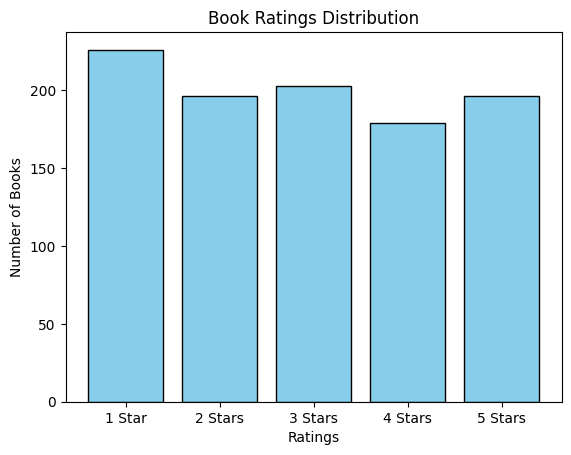

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_rating_distribution(books):
    ratings = [book["Rating"] for book in books]
    rating_counts = Counter(ratings)

    # Data for the bar chart
    labels = ["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
    counts = [rating_counts.get(i, 0) for i in range(1, 6)]

    # Plot
    plt.bar(labels, counts, color="skyblue", edgecolor="black")
    plt.title("Book Ratings Distribution")
    plt.xlabel("Ratings")
    plt.ylabel("Number of Books")
    plt.show()

# Call the function
plot_rating_distribution(books)


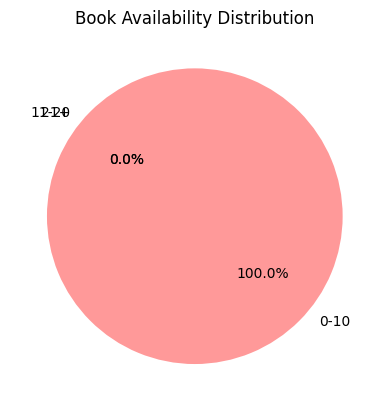

In [ ]:
def plot_availability_distribution(books):
    bins = [0, 10, 20, float("inf")]  # Define ranges
    labels = ["0-10", "11-20", "21+"]
    availability_counts = [0] * len(labels)

    for book in books:
        for i, upper_limit in enumerate(bins[1:]):
            if book["Availability"] <= upper_limit:
                availability_counts[i] += 1
                break

    # Plot
    plt.pie(availability_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99"])
    plt.title("Book Availability Distribution")
    plt.show()

# Call the function
plot_availability_distribution(books)


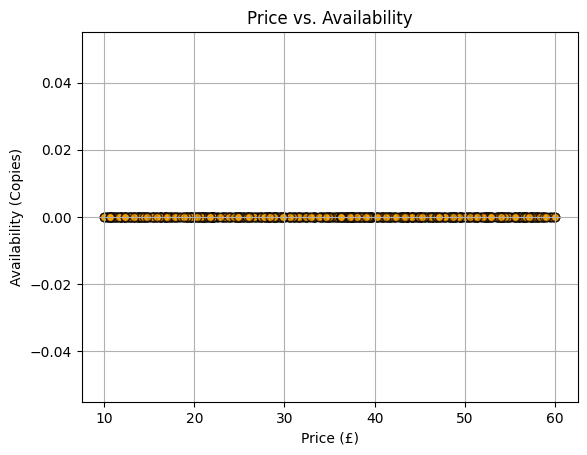

In [ ]:
def plot_price_vs_availability(books):
    prices = [book["Price"] for book in books]
    availability = [book["Availability"] for book in books]

    # Plot
    plt.scatter(prices, availability, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Price vs. Availability")
    plt.xlabel("Price (£)")
    plt.ylabel("Availability (Copies)")
    plt.grid(True)
    plt.show()

# Call the function
plot_price_vs_availability(books)


Verify and Interpret
Run each visualization code block and verify that the graphs display meaningful insights. Examples:

A ratings bar chart will show whether most books have average (3 stars) or high ratings.
The availability pie chart will show if most books are available in limited quantities.
The scatter plot might reveal if expensive books are less available.

In [ ]:
import os

# Create a 'plots' directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

def plot_rating_distribution(books):
    from collections import Counter
    import matplotlib.pyplot as plt

    ratings = [book["Rating"] for book in books]
    rating_counts = Counter(ratings)

    labels = ["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
    counts = [rating_counts.get(i, 0) for i in range(1, 6)]

    # Plot
    plt.bar(labels, counts, color="skyblue", edgecolor="black")
    plt.title("Book Ratings Distribution")
    plt.xlabel("Ratings")
    plt.ylabel("Number of Books")

    # Save plot
    plt.savefig("plots/ratings_distribution.png")
    print("Ratings distribution plot saved as 'plots/ratings_distribution.png'.")

    plt.close()

# Call the function
plot_rating_distribution(books)


Ratings distribution plot saved as 'plots/ratings_distribution.png'.


In [ ]:
def plot_availability_distribution(books):
    import matplotlib.pyplot as plt

    bins = [0, 10, 20, float("inf")]
    labels = ["0-10", "11-20", "21+"]
    availability_counts = [0] * len(labels)

    for book in books:
        for i, upper_limit in enumerate(bins[1:]):
            if book["Availability"] <= upper_limit:
                availability_counts[i] += 1
                break

    # Plot
    plt.pie(
        availability_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=140,
        colors=["#ff9999", "#66b3ff", "#99ff99"],
    )
    plt.title("Book Availability Distribution")

    # Save plot
    plt.savefig("plots/availability_distribution.png")
    print("Availability distribution plot saved as 'plots/availability_distribution.png'.")

    plt.close()

# Call the function
plot_availability_distribution(books)


Availability distribution plot saved as 'plots/availability_distribution.png'.


In [ ]:
def plot_price_vs_availability(books):
    import matplotlib.pyplot as plt

    prices = [book["Price"] for book in books]
    availability = [book["Availability"] for book in books]

    # Plot
    plt.scatter(prices, availability, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Price vs. Availability")
    plt.xlabel("Price (£)")
    plt.ylabel("Availability (Copies)")
    plt.grid(True)

    # Save plot
    plt.savefig("plots/price_vs_availability.png")
    print("Price vs. availability plot saved as 'plots/price_vs_availability.png'.")

    plt.close()

# Call the function
plot_price_vs_availability(books)


Price vs. availability plot saved as 'plots/price_vs_availability.png'.
